# First-order central derivative method 

In [ ]:
import ase.io
import yaml
import numpy as np
import pymatgen.io.vasp
import xml.etree.ElementTree as ET
import yaml
import ase.io
from ase.units import Bohr
from pymatgen.io.vasp import Vasprun
import numpy as np
import pandas as pd

pd.set_option("max_colwidth", None)
Thz_to_cm = 33.356
delta = 0.01 # Finite displacement value in angstrom to calculate dchi_dtau
n_atom = 10
structure = ase.io.read("POSCAR")
volume = structure.get_volume()

def dielec(x):
    """
    Extracting the electronic dielectric tensor

    Args:
        x (integer): number of directory

    Returns:
        array: electronic dielectric tensor
    """
    vrun = Vasprun(f'{x}/vasprun.xml')
    die = vrun.epsilon_static
    return np.array(die)

def first_diff_die(i, j):
    """
      First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1) using the plus displacement and the minus displacement.

    Args:
        i (integer): number of atom (according to the POSCAR file order, the index starts from 1 ~)
        j (integer): x(1) or y(2) or z(3)

    Returns:
        array : First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1)
    """
    return (dielec(f"{i+n_atom+((j-1)*(2*n_atom)):03d}") - dielec(f"{i+((j-1)*(2*n_atom)):03d}")) * (-1)/(2*delta)

change_die = pd.DataFrame(columns=["atom", "coordinate", "delta_Xi"])
change_die.values

for i in range(1, n_atom+1):
    for j in range(1,4):
        change_die.loc[len(change_die.index)] = [i, j, first_diff_die(i,j)]

print("The change of the dielectric tensor is")        
print(change_die)
np.save("dchi_dtau_FE", change_die)


# Fourth-order forward derivative method using the finite difference method

In [2]:
import ase.io
import yaml
import numpy as np
import pymatgen.io.vasp
import xml.etree.ElementTree as ET
import yaml
import ase.io
from ase.units import Bohr
from pymatgen.io.vasp import Vasprun
import numpy as np
import pandas as pd

pd.set_option("max_colwidth", None)
Thz_to_cm = 33.356
delta = 0.005 # Finite displacement value in angstrom to calculate dchi_dtau
n_atom = 10
structure = ase.io.read("POSCAR")
volume = structure.get_volume()

def dielec(x):
    """
    Extracting the electronic dielectric tensor

    Args:
        x (integer): number of directory

    Returns:
        array: electronic dielectric tensor
    """
    vrun = Vasprun(f'{x}/vasprun.xml')
    die = vrun.epsilon_static
    return np.array(die)

def first_diff_die(i, j):
    """
      First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1) using the plus displacement and the minus displacement.

    Args:
        i (integer): number of atom (according to the POSCAR file order, the index starts from 1 ~)
        j (integer): x(1) or y(2) or z(3)

    Returns:
        array : First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1)
    """
    value = (-3*dielec(f"3-5.raman_0.02_Ang/{i+((j-1)*(2*n_atom)):03d}") + 16*dielec(f"3-4.raman_0.015_Ang/{i+((j-1)*(2*n_atom)):03d}") - 36*dielec(f"3.raman_0.01_Ang/{i+((j-1)*(2*n_atom)):03d}") + 48*dielec(f"3-3.raman_0.005_Ang/{i+((j-1)*(2*n_atom)):03d}") - 25*dielec(f"{000:03d}"))
    return value / (12 * delta)

change_die = pd.DataFrame(columns=["atom", "coordinate", "delta_Xi"])
change_die.values

for i in range(1, n_atom+1):
    for j in range(1,4):
        change_die.loc[len(change_die.index)] = [i, j, first_diff_die(i,j)]

print("The change of the dielectric tensor is")        
print(change_die)
np.save("dchi_dtau_PE_forward_4th_order", change_die)


FileNotFoundError: [Errno 2] No such file or directory: 'POSCAR'

In [ ]:
import ase.io
import yaml
import numpy as np
import pymatgen.io.vasp
import xml.etree.ElementTree as ET
import yaml
import ase.io
from ase.units import Bohr
from pymatgen.io.vasp import Vasprun
import numpy as np
import pandas as pd

pd.set_option("max_colwidth", None)
Thz_to_cm = 33.356
delta = 0.0025 # Finite displacement value in angstrom to calculate dchi_dtau
n_atom = 10
structure = ase.io.read("POSCAR")
volume = structure.get_volume()

def dielec(x):
    """
    Extracting the electronic dielectric tensor

    Args:
        x (integer): number of directory

    Returns:
        array: electronic dielectric tensor
    """
    vrun = Vasprun(f'{x}/vasprun.xml')
    die = vrun.epsilon_static
    return np.array(die)

def first_diff_die(i, j):
    """
      First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1) using the plus displacement and the minus displacement.

    Args:
        i (integer): number of atom (according to the POSCAR file order, the index starts from 1 ~)
        j (integer): x(1) or y(2) or z(3)

    Returns:
        array : First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1)
    """
    value = (-3*dielec(f"3.raman_0.01_Ang/{i+((j-1)*(2*n_atom)):03d}") + 16*dielec(f"3-7.raman_0.0075_Ang/{i+((j-1)*(2*n_atom)):03d}") - 36*dielec(f"3-3.raman_0.005_Ang/{i+((j-1)*(2*n_atom)):03d}") + 48*dielec(f"3-6.raman_0.0025_Ang/{i+((j-1)*(2*n_atom)):03d}") - 25*dielec(f"{000:03d}"))
    return value / (12 * delta)

change_die = pd.DataFrame(columns=["atom", "coordinate", "delta_Xi"])
change_die.values

for i in range(1, n_atom+1):
    for j in range(1,4):
        change_die.loc[len(change_die.index)] = [i, j, first_diff_die(i,j)]

print("The change of the dielectric tensor is")        
print(change_die)
np.save("dchi_dtau_PE_forward_4th_order_0.0025Ang", change_die)


# Third-order forward derivatives

In [ ]:
import ase.io
import yaml
import numpy as np
import pymatgen.io.vasp
import xml.etree.ElementTree as ET
import yaml
import ase.io
from ase.units import Bohr
from pymatgen.io.vasp import Vasprun
import numpy as np
import pandas as pd

pd.set_option("max_colwidth", None)
Thz_to_cm = 33.356
delta = 0.005 # Finite displacement value in angstrom to calculate dchi_dtau
n_atom = 10
structure = ase.io.read("POSCAR")
volume = structure.get_volume()

def dielec(x):
    """
    Extracting the electronic dielectric tensor

    Args:
        x (integer): number of directory

    Returns:
        array: electronic dielectric tensor
    """
    vrun = Vasprun(f'{x}/vasprun.xml')
    die = vrun.epsilon_static
    return np.array(die)

def first_diff_die(i, j):
    """
      First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1) using the plus displacement and the minus displacement.

    Args:
        i (integer): number of atom (according to the POSCAR file order, the index starts from 1 ~)
        j (integer): x(1) or y(2) or z(3)

    Returns:
        array : First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1)
    """
    value = ( 2*dielec(f"3-4.raman_0.015_Ang/{i+((j-1)*(2*n_atom)):03d}") - 9*dielec(f"3.raman_0.01_Ang/{i+((j-1)*(2*n_atom)):03d}") + 18*dielec(f"3-3.raman_0.005_Ang/{i+((j-1)*(2*n_atom)):03d}") - 11*dielec(f"{000:03d}"))
    return value / (6 * delta)

change_die = pd.DataFrame(columns=["atom", "coordinate", "delta_Xi"])
change_die.values

for i in range(1, n_atom+1):
    for j in range(1,4):
        change_die.loc[len(change_die.index)] = [i, j, first_diff_die(i,j)]

print("The change of the dielectric tensor is")        
print(change_die)
np.save("dchi_dtau_PE_forward_3rd_order", change_die)


# Second-order forward derivatives

In [ ]:
import ase.io
import yaml
import numpy as np
import pymatgen.io.vasp
import xml.etree.ElementTree as ET
import yaml
import ase.io
from ase.units import Bohr
from pymatgen.io.vasp import Vasprun
import numpy as np
import pandas as pd

pd.set_option("max_colwidth", None)
Thz_to_cm = 33.356
delta = 0.005 # Finite displacement value in angstrom to calculate dchi_dtau
n_atom = 10
structure = ase.io.read("POSCAR")
volume = structure.get_volume()

def dielec(x):
    """
    Extracting the electronic dielectric tensor

    Args:
        x (integer): number of directory

    Returns:
        array: electronic dielectric tensor
    """
    vrun = Vasprun(f'{x}/vasprun.xml')
    die = vrun.epsilon_static
    return np.array(die)

def first_diff_die(i, j):
    """
      First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1) using the plus displacement and the minus displacement.

    Args:
        i (integer): number of atom (according to the POSCAR file order, the index starts from 1 ~)
        j (integer): x(1) or y(2) or z(3)

    Returns:
        array : First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1)
    """
    value = ( -dielec(f"3.raman_0.01_Ang/{i+((j-1)*(2*n_atom)):03d}") + 4*dielec(f"3-3.raman_0.005_Ang/{i+((j-1)*(2*n_atom)):03d}") - 3*dielec(f"{000:03d}"))
    return value / (2 * delta)

change_die = pd.DataFrame(columns=["atom", "coordinate", "delta_Xi"])
change_die.values

for i in range(1, n_atom+1):
    for j in range(1,4):
        change_die.loc[len(change_die.index)] = [i, j, first_diff_die(i,j)]

print("The change of the dielectric tensor is")        
print(change_die)
np.save("dchi_dtau_PE_forward_2nd_order", change_die)


# First-order forward derivative

In [ ]:
import ase.io
import yaml
import numpy as np
import pymatgen.io.vasp
import xml.etree.ElementTree as ET
import yaml
import ase.io
from ase.units import Bohr
from pymatgen.io.vasp import Vasprun
import numpy as np
import pandas as pd

pd.set_option("max_colwidth", None)
Thz_to_cm = 33.356
delta = 0.005 # Finite displacement value in angstrom to calculate dchi_dtau
n_atom = 10
structure = ase.io.read("POSCAR")
volume = structure.get_volume()

def dielec(x):
    """
    Extracting the electronic dielectric tensor

    Args:
        x (integer): number of directory

    Returns:
        array: electronic dielectric tensor
    """
    vrun = Vasprun(f'{x}/vasprun.xml')
    die = vrun.epsilon_static
    return np.array(die)

def first_diff_die(i, j):
    """
      First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1) using the plus displacement and the minus displacement.

    Args:
        i (integer): number of atom (according to the POSCAR file order, the index starts from 1 ~)
        j (integer): x(1) or y(2) or z(3)

    Returns:
        array : First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1)
    """
    value = ( dielec(f"3-3.raman_0.005_Ang/{i+((j-1)*(2*n_atom)):03d}") - dielec(f"{000:03d}"))
    return value / ( delta )

change_die = pd.DataFrame(columns=["atom", "coordinate", "delta_Xi"])
change_die.values

for i in range(1, n_atom+1):
    for j in range(1,4):
        change_die.loc[len(change_die.index)] = [i, j, first_diff_die(i,j)]

print("The change of the dielectric tensor is")        
print(change_die)
np.save("dchi_dtau_PE_forward_1st_order", change_die)


# Forward 6th order without the center point

In [ ]:
import ase.io
import yaml
import numpy as np
import pymatgen.io.vasp
import xml.etree.ElementTree as ET
import yaml
import ase.io
from ase.units import Bohr
from pymatgen.io.vasp import Vasprun
import numpy as np
import pandas as pd

pd.set_option("max_colwidth", None)
Thz_to_cm = 33.356
delta = 0.0025 # Finite displacement value in angstrom to calculate dchi_dtau
n_atom = 10
structure = ase.io.read("POSCAR")
volume = structure.get_volume()

def dielec(x):
    """
    Extracting the electronic dielectric tensor

    Args:
        x (integer): number of directory

    Returns:
        array: electronic dielectric tensor
    """
    vrun = Vasprun(f'{x}/vasprun.xml')
    die = vrun.epsilon_static
    return np.array(die)

def first_diff_die(i, j):
    """
      First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1) using the plus displacement and the minus displacement.

    Args:
        i (integer): number of atom (according to the POSCAR file order, the index starts from 1 ~)
        j (integer): x(1) or y(2) or z(3)

    Returns:
        array : First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1)
    """
    value = (81*dielec(f"3-5.raman_0.02_Ang/{i+((j-1)*(2*n_atom)):03d}") - 742*dielec(f"3-4.raman_0.015_Ang/{i+((j-1)*(2*n_atom)):03d}") + 5355*dielec(f"3.raman_0.01_Ang/{i+((j-1)*(2*n_atom)):03d}") - 10976*dielec(f"3-7.raman_0.0075_Ang/{i+((j-1)*(2*n_atom)):03d}") + 9450*dielec(f"3-3.raman_0.005_Ang/{i+((j-1)*(2*n_atom)):03d}") - 3168*dielec(f"3-6.raman_0.0025_Ang/{i+((j-1)*(2*n_atom)):03d}"))
    return value / (420 * delta)

change_die = pd.DataFrame(columns=["atom", "coordinate", "delta_Xi"])
change_die.values

for i in range(1, n_atom+1):
    for j in range(1,4):
        change_die.loc[len(change_die.index)] = [i, j, first_diff_die(i,j)]

print("The change of the dielectric tensor is")        
print(change_die)
np.save("dchi_dtau_PE_forward_6th_order_exclude_center", change_die)


In [88]:
import numpy as np

def max_dchi_dtau(npy_file, n_atom=10):
    dchi_dtau = np.load(npy_file, allow_pickle=True)
    max_dchi_dtau_list = []
    for  i in range(3*n_atom):
        max_dchi_dtau_list.append(np.max(np.max(np.abs(dchi_dtau[:, 2:3][i]))))
    return max_dchi_dtau_list

max_dchi_dtau_PE_forward_1st = max_dchi_dtau("VASP_files/dchi_dtau_PE_forward_1st_order.npy")
max_dchi_dtau_PE_forward_2nd = max_dchi_dtau("VASP_files/dchi_dtau_PE_forward_2nd_order.npy")
max_dchi_dtau_PE_forward_3rd = max_dchi_dtau("VASP_files/dchi_dtau_PE_forward_3rd_order.npy")
max_dchi_dtau_PE_forward_4th = max_dchi_dtau("VASP_files/dchi_dtau_PE_forward_4th_order.npy")
max_dchi_dtau_PE_forward_6th = max_dchi_dtau("VASP_files/dchi_dtau_PE_forward_6th_order_exclude_center.npy")

max_dchi_dtau_FE = max_dchi_dtau("VASP_files/dchi_dtau_FE.npy")
max_dchi_dtau_AFE = max_dchi_dtau("VASP_files/dchi_dtau_AFE.npy")
max_dchi_dtau_PE = max_dchi_dtau("VASP_files/dchi_dtau_PE.npy")
max_dchi_dtau_PE_forward = max_dchi_dtau("VASP_files/dchi_dtau_PE_forward.npy")
max_dchi_dtau_AFE_forward = max_dchi_dtau("VASP_files/dchi_dtau_AFE_forward.npy")
max_dchi_dtau_PE_005 = max_dchi_dtau("VASP_files/dchi_dtau_PE_0.05.npy")
max_dchi_dtau_PE_01 = max_dchi_dtau("VASP_files/dchi_dtau_PE_0.1.npy")
max_dchi_dtau_PE_forward_01 = max_dchi_dtau("VASP_files/dchi_dtau_PE_forward_01.npy")
max_dchi_dtau_PE_forward_005 = max_dchi_dtau("VASP_files/dchi_dtau_PE_forward_005.npy")



print(np.array(max_dchi_dtau_FE))

[0.3008055 0.300795  0.0625225 0.3008005 0.300793  0.0624545 2.4084165
 2.4083755 5.0410265 2.408542  2.408529  5.0409605 0.655922  1.7178635
 1.678424  1.72495   0.6510605 1.6785315 0.655969  1.717884  1.678557
 1.7249825 0.651034  1.678535  1.2506185 1.2700945 1.678528  1.250592
 1.2700995 1.6785025]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, figsize=(25, 12))
fig.dpi = 100
mode = ["Li1_x", "Li1_y", "Li1_z", "Li2_x", "Li2_Y", "Li2_z", "Nb1_x", "Nb1_y", "Nb1_z", "Nb2_x", "Nb2_y", "Nb2_z", "O1_x", "O1_y", "O1_z", "O2_x", "O2_y", "O2_z", "O3_x", "O3_y", "O3_z", "O4_x", "O4_y", "O4_z", "O5_x", "O5_y", "O5_z", "O6_x", "O6_y", "O6_z"]



ax[0].bar(mode, max_dchi_dtau_PE)
ax[0].axis([-0.5, 30, 0, 5.5])
# ax[0].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[0].set_xlabel('mode')
ax[0].grid(True)
ax[0].set_title("Paraelectric phase")
ax[0].legend()
ax[0].set_xticks(mode)

ax[1].bar(mode, max_dchi_dtau_AFE)
ax[1].axis([-0.5, 30, 0, 5.5])
# ax[1].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[1].set_xlabel('mode')
ax[1].grid(True)
ax[1].set_title("Antieferroelectric phase")
ax[1].legend()
ax[1].set_xticks(mode)


ax[2].bar(mode, max_dchi_dtau_FE)
ax[2].axis([-0.5, 30, 0, 5.5])
# ax[2].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[2].set_xlabel('mode')
ax[2].grid(True)
ax[2].set_title("Ferroelectric phase")
ax[2].legend()
ax[2].set_xticks(mode)


fig.suptitle("Maximum component of the change of dielectric tensor (1/Angstrom)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Maximum component of the change of dielectric tensor (1/Angstrom)')

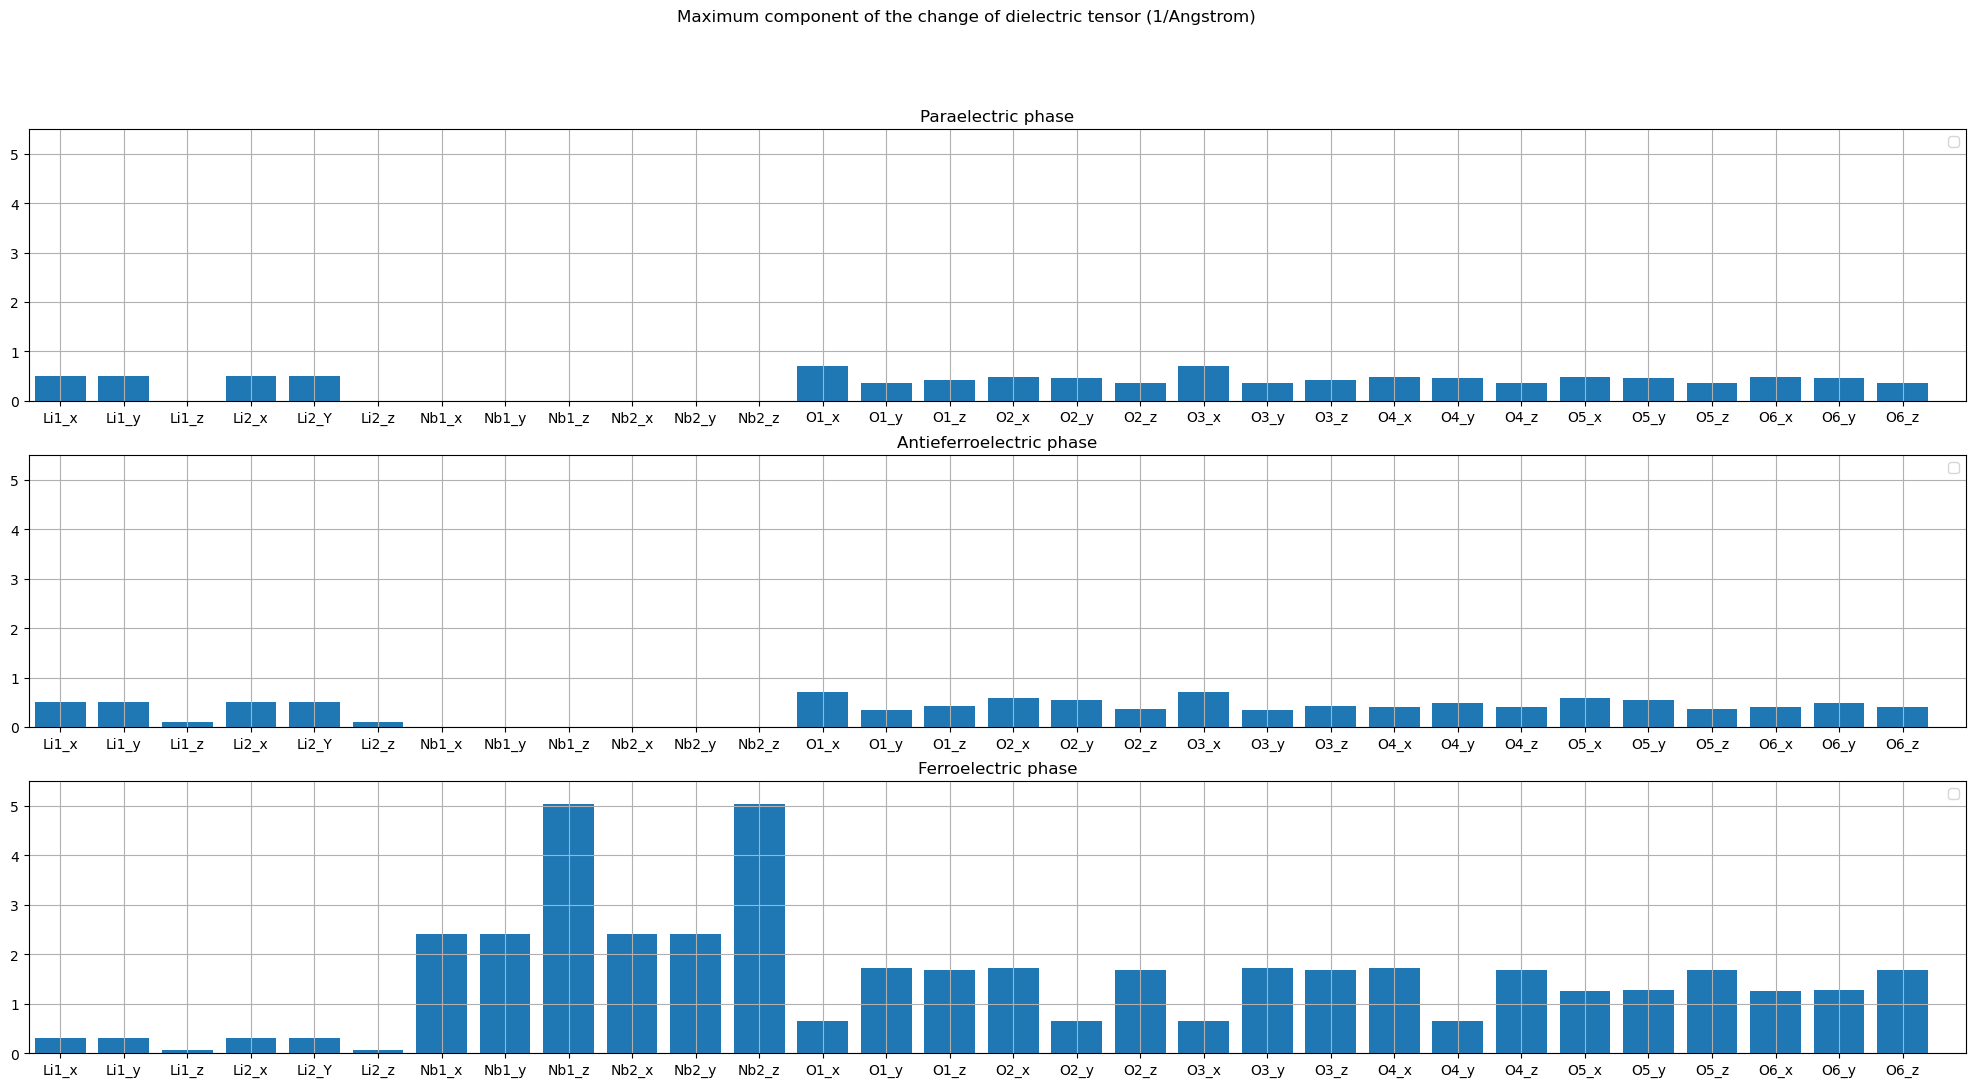

In [101]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, figsize=(25, 12))
fig.dpi = 100
mode = ["Li1_x", "Li1_y", "Li1_z", "Li2_x", "Li2_Y", "Li2_z", "Nb1_x", "Nb1_y", "Nb1_z", "Nb2_x", "Nb2_y", "Nb2_z", "O1_x", "O1_y", "O1_z", "O2_x", "O2_y", "O2_z", "O3_x", "O3_y", "O3_z", "O4_x", "O4_y", "O4_z", "O5_x", "O5_y", "O5_z", "O6_x", "O6_y", "O6_z"]



ax[0].bar(mode, max_dchi_dtau_PE)
ax[0].axis([-0.5, 30, 0, 5.5])
# ax[0].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[0].set_xlabel('mode')
ax[0].grid(True)
ax[0].set_title("Paraelectric phase")
ax[0].legend()
ax[0].set_xticks(mode)

ax[1].bar(mode, max_dchi_dtau_AFE)
ax[1].axis([-0.5, 30, 0, 5.5])
# ax[1].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[1].set_xlabel('mode')
ax[1].grid(True)
ax[1].set_title("Antieferroelectric phase")
ax[1].legend()
ax[1].set_xticks(mode)


ax[2].bar(mode, max_dchi_dtau_FE)
ax[2].axis([-0.5, 30, 0, 5.5])
# ax[2].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[2].set_xlabel('mode')
ax[2].grid(True)
ax[2].set_title("Ferroelectric phase")
ax[2].legend()
ax[2].set_xticks(mode)


fig.suptitle("Maximum component of the change of dielectric tensor (1/Angstrom)")

In [91]:
print(np.transpose(max_dchi_dtau_PE))
print(np.transpose(max_dchi_dtau_AFE))
print(np.transpose(max_dchi_dtau_FE))


[5.078185e-01 5.079085e-01 9.550000e-05 5.078040e-01 5.076875e-01
 3.405000e-04 9.360000e-04 7.230000e-04 1.609000e-03 1.193000e-03
 8.425000e-04 1.415500e-03 6.964760e-01 3.573480e-01 4.200680e-01
 4.788150e-01 4.540965e-01 3.632840e-01 6.965930e-01 3.574165e-01
 4.200965e-01 4.790745e-01 4.537915e-01 3.630025e-01 4.788770e-01
 4.542275e-01 3.634175e-01 4.791665e-01 4.538920e-01 3.629610e-01]
[5.156445e-01 5.158345e-01 1.051010e-01 5.155140e-01 5.155000e-01
 1.051155e-01 8.755000e-04 6.860000e-04 1.549500e-03 1.178500e-03
 8.465000e-04 1.473000e-03 7.088785e-01 3.542140e-01 4.331165e-01
 5.863760e-01 5.474130e-01 3.704630e-01 7.088510e-01 3.542080e-01
 4.332270e-01 4.012980e-01 4.854125e-01 3.993295e-01 5.847470e-01
 5.475280e-01 3.705015e-01 4.012815e-01 4.854075e-01 3.991425e-01]
[0.3008055 0.300795  0.0625225 0.3008005 0.300793  0.0624545 2.4084165
 2.4083755 5.0410265 2.408542  2.408529  5.0409605 0.655922  1.7178635
 1.678424  1.72495   0.6510605 1.6785315 0.655969  1.717884  1.6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


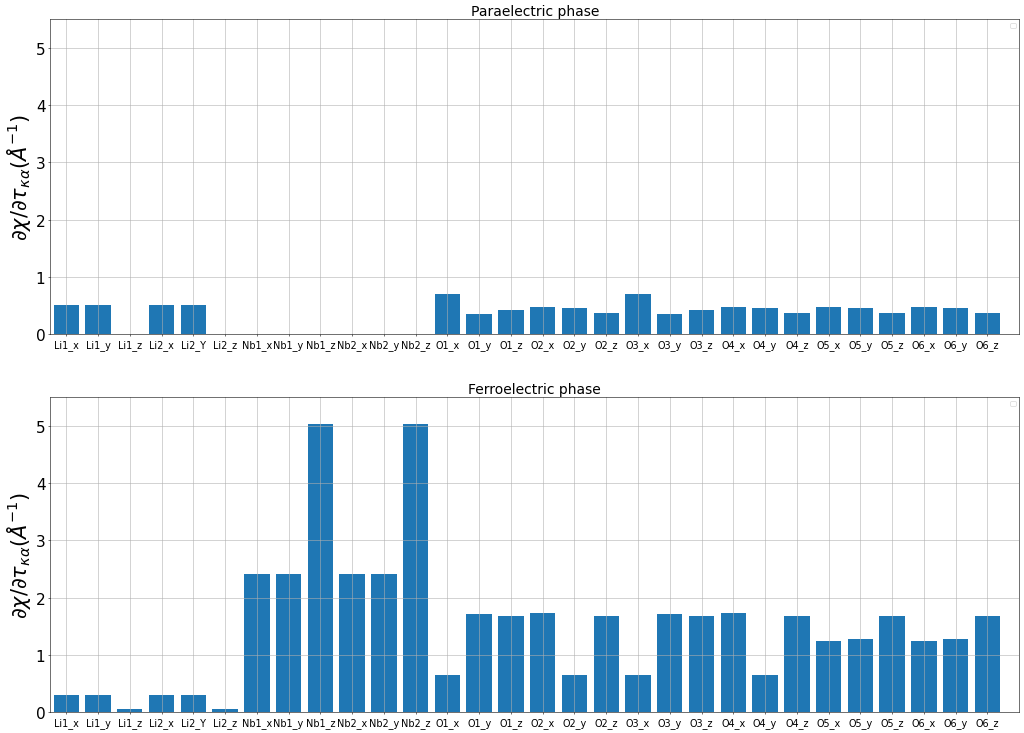

In [85]:
##

# 2023 Nov. 7th working on for the paper.

##

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, figsize=(25, 18))
fig.dpi = 50
mode = ["Li1_x", "Li1_y", "Li1_z", "Li2_x", "Li2_Y", "Li2_z", "Nb1_x", "Nb1_y", "Nb1_z", "Nb2_x", "Nb2_y", "Nb2_z", "O1_x", "O1_y", "O1_z", "O2_x", "O2_y", "O2_z", "O3_x", "O3_y", "O3_z", "O4_x", "O4_y", "O4_z", "O5_x", "O5_y", "O5_z", "O6_x", "O6_y", "O6_z"]



ax[0].bar(mode, max_dchi_dtau_PE)
ax[0].axis([-0.5, 30, 0, 5.5])
# ax[0].set_ylabel(r"$\frac{\partial\chi^{(1)}_{11}}{\partial \tau}(\AA^{-1})$", fontsize=30)
ax[0].set_ylabel(r"$\partial\chi/\partial \tau_{\kappa\alpha}(\AA^{-1})$", fontsize=30)
# ax[0].set_xlabel('mode')
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=22)
ax[0].grid(True)
ax[0].set_title("Paraelectric phase", fontsize=20)
ax[0].legend()
ax[0].set_xticks(mode)

ax[1].bar(mode, max_dchi_dtau_FE)
ax[1].axis([-0.5, 30, 0, 5.5])
ax[1].set_ylabel(r"$\partial\chi/\partial \tau_{\kappa\alpha}(\AA^{-1})$", fontsize=30)
# ax[2].set_xlabel('mode')
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=22)
ax[1].grid(True)
ax[1].set_title("Ferroelectric phase", fontsize=20)
ax[1].legend()
ax[1].set_xticks(mode)


# fig.suptitle("Maximum component of the change of dielectric tensor (1/Angstrom)")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, figsize=(25, 12))
fig.dpi = 100
mode = ["Li1_x", "Li1_y", "Li1_z", "Li2_x", "Li2_Y", "Li2_z", "Nb1_x", "Nb1_y", "Nb1_z", "Nb2_x", "Nb2_y", "Nb2_z", "O1_x", "O1_y", "O1_z", "O2_x", "O2_y", "O2_z", "O3_x", "O3_y", "O3_z", "O4_x", "O4_y", "O4_z", "O5_x", "O5_y", "O5_z", "O6_x", "O6_y", "O6_z"]



ax[0].bar(mode, max_dchi_dtau_PE)
ax[0].axis([-0.5, 30, 0, 5.5])
# ax[0].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[0].set_xlabel('mode')
ax[0].grid(True)
ax[0].set_title("Paraelectric phase")
ax[0].legend()
ax[0].set_xticks(mode)

ax[1].bar(mode, max_dchi_dtau_AFE)
ax[1].axis([-0.5, 30, 0, 5.5])
# ax[1].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[1].set_xlabel('mode')
ax[1].grid(True)
ax[1].set_title("Antieferroelectric phase")
ax[1].legend()
ax[1].set_xticks(mode)


ax[2].bar(mode, max_dchi_dtau_FE)
ax[2].axis([-0.5, 30, 0, 5.5])
# ax[2].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[2].set_xlabel('mode')
ax[2].grid(True)
ax[2].set_title("Ferroelectric phase")
ax[2].legend()
ax[2].set_xticks(mode)


fig.suptitle("Maximum component of the change of dielectric tensor (1/Angstrom)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Maximum component of the change of dielectric tensor (1/Angstrom)')

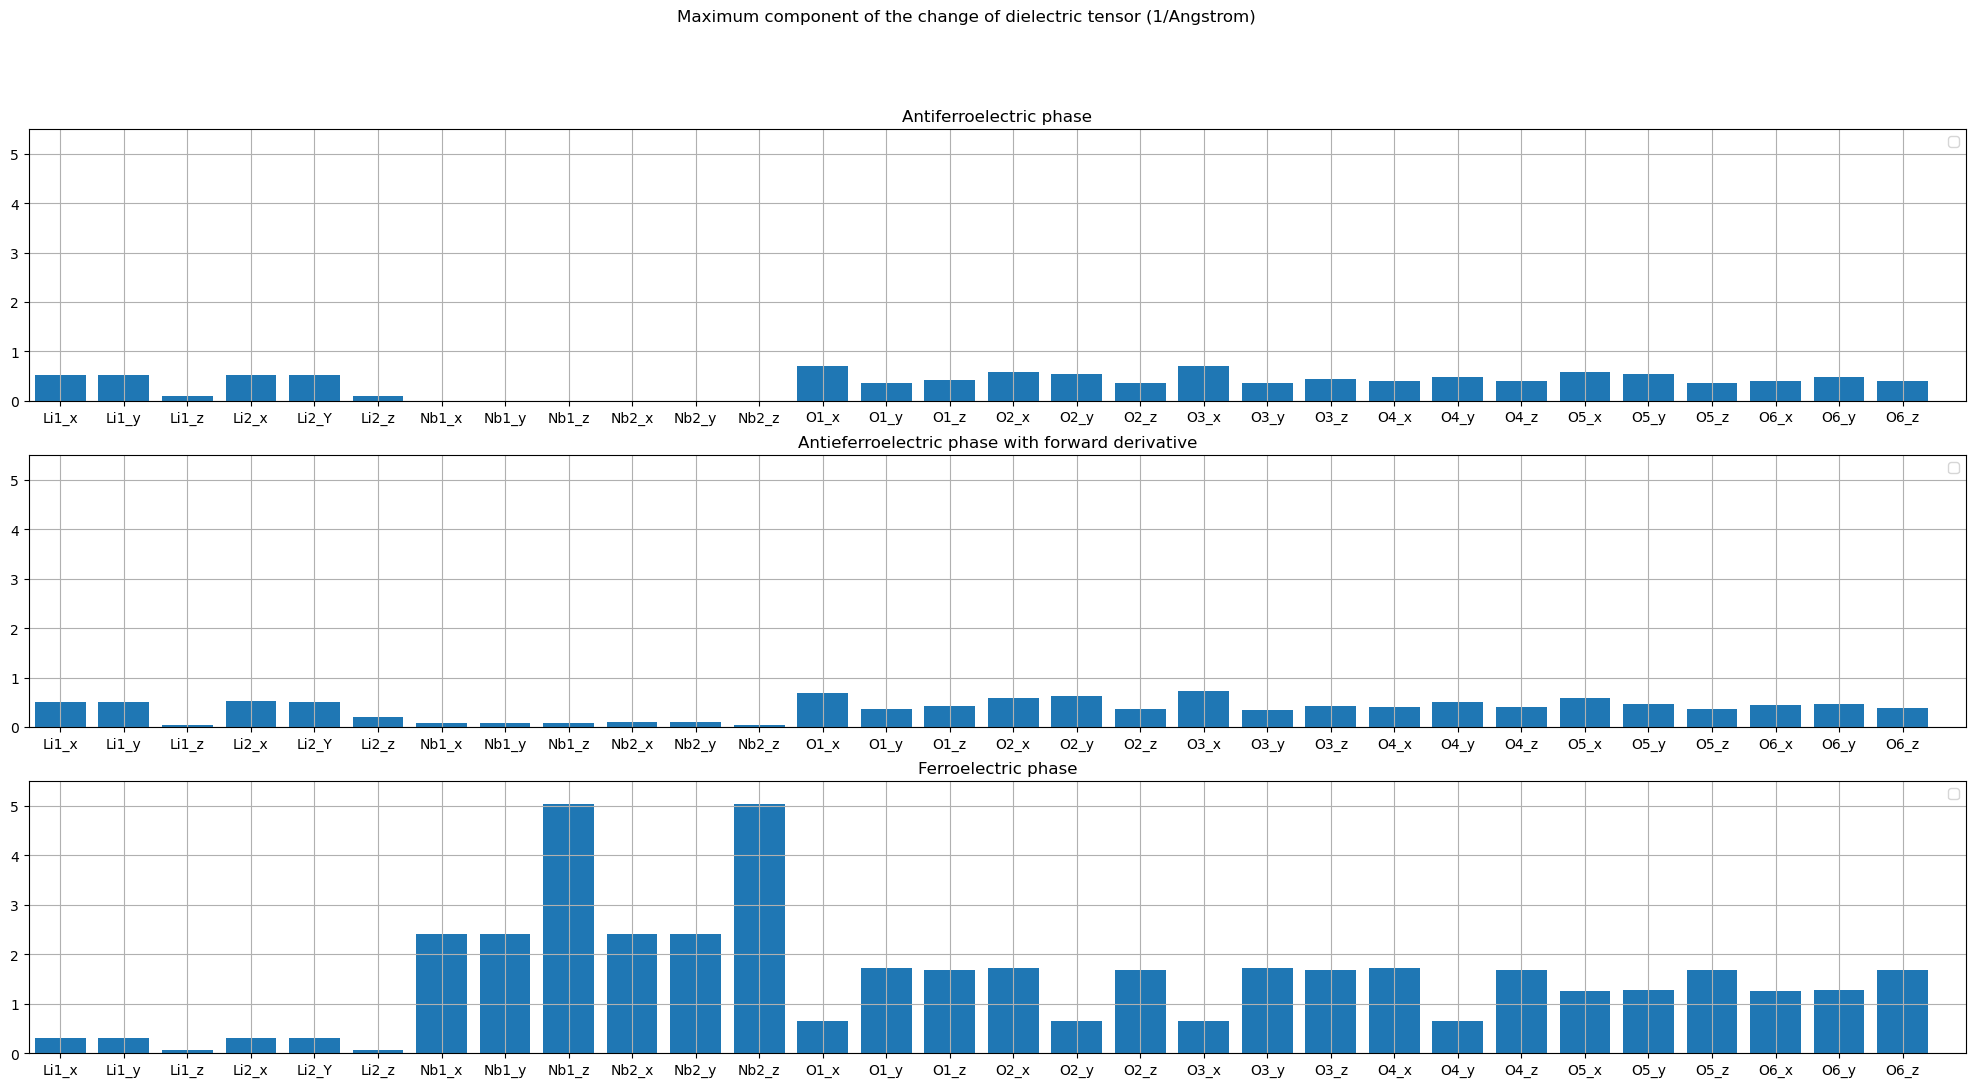

In [54]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, figsize=(25, 12))
fig.dpi = 100
mode = ["Li1_x", "Li1_y", "Li1_z", "Li2_x", "Li2_Y", "Li2_z", "Nb1_x", "Nb1_y", "Nb1_z", "Nb2_x", "Nb2_y", "Nb2_z", "O1_x", "O1_y", "O1_z", "O2_x", "O2_y", "O2_z", "O3_x", "O3_y", "O3_z", "O4_x", "O4_y", "O4_z", "O5_x", "O5_y", "O5_z", "O6_x", "O6_y", "O6_z"]



ax[0].bar(mode, max_dchi_dtau_AFE)
ax[0].axis([-0.5, 30, 0, 5.5])
# ax[0].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[0].set_xlabel('mode')
ax[0].grid(True)
ax[0].set_title("Antiferroelectric phase")
ax[0].legend()
ax[0].set_xticks(mode)

ax[1].bar(mode, max_dchi_dtau_AFE_forward)
ax[1].axis([-0.5, 30, 0, 5.5])
# ax[1].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[1].set_xlabel('mode')
ax[1].grid(True)
ax[1].set_title("Antieferroelectric phase with forward derivative")
ax[1].legend()
ax[1].set_xticks(mode)


ax[2].bar(mode, max_dchi_dtau_FE)
ax[2].axis([-0.5, 30, 0, 5.5])
# ax[2].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[2].set_xlabel('mode')
ax[2].grid(True)
ax[2].set_title("Ferroelectric phase")
ax[2].legend()
ax[2].set_xticks(mode)


fig.suptitle("Maximum component of the change of dielectric tensor (1/Angstrom)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'The change of susceptibility with 0.01, 0.05, and 0.1 Ang')

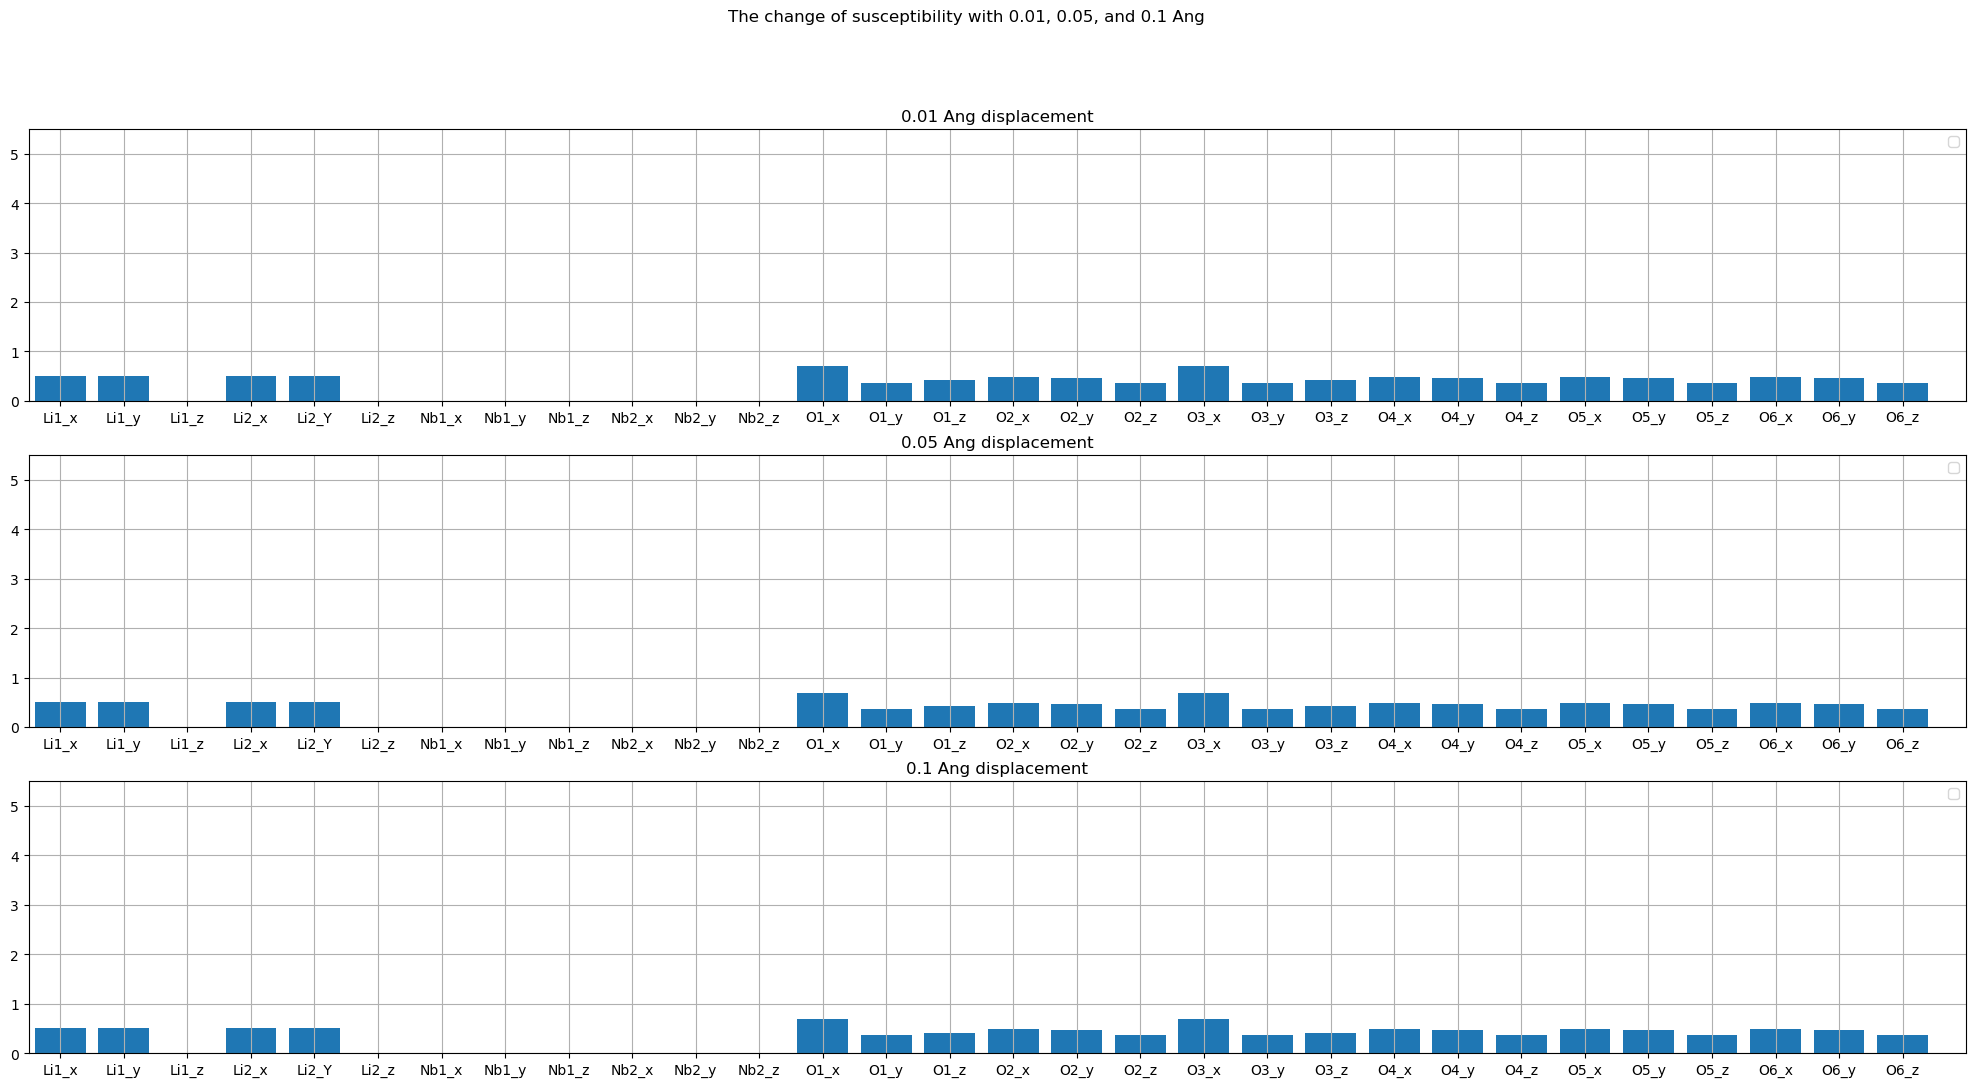

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, figsize=(25, 12))
fig.dpi = 100
mode = ["Li1_x", "Li1_y", "Li1_z", "Li2_x", "Li2_Y", "Li2_z", "Nb1_x", "Nb1_y", "Nb1_z", "Nb2_x", "Nb2_y", "Nb2_z", "O1_x", "O1_y", "O1_z", "O2_x", "O2_y", "O2_z", "O3_x", "O3_y", "O3_z", "O4_x", "O4_y", "O4_z", "O5_x", "O5_y", "O5_z", "O6_x", "O6_y", "O6_z"]



ax[0].bar(mode, max_dchi_dtau_PE)
ax[0].axis([-0.5, 30, 0, 5.5])
# ax[0].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[0].set_xlabel('mode')
ax[0].grid(True)
ax[0].set_title("0.01 Ang displacement")
ax[0].legend()
ax[0].set_xticks(mode)

ax[1].bar(mode, max_dchi_dtau_PE_005)
ax[1].axis([-0.5, 30, 0, 5.5])
# ax[1].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[1].set_xlabel('mode')
ax[1].grid(True)
ax[1].set_title("0.05 Ang displacement")
ax[1].legend()
ax[1].set_xticks(mode)


ax[2].bar(mode, max_dchi_dtau_PE_01)
ax[2].axis([-0.5, 30, 0, 5.5])
# ax[2].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[2].set_xlabel('mode')
ax[2].grid(True)
ax[2].set_title("0.1 Ang displacement")
ax[2].legend()
ax[2].set_xticks(mode)


fig.suptitle("The change of susceptibility with 0.01, 0.05, and 0.1 Ang")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


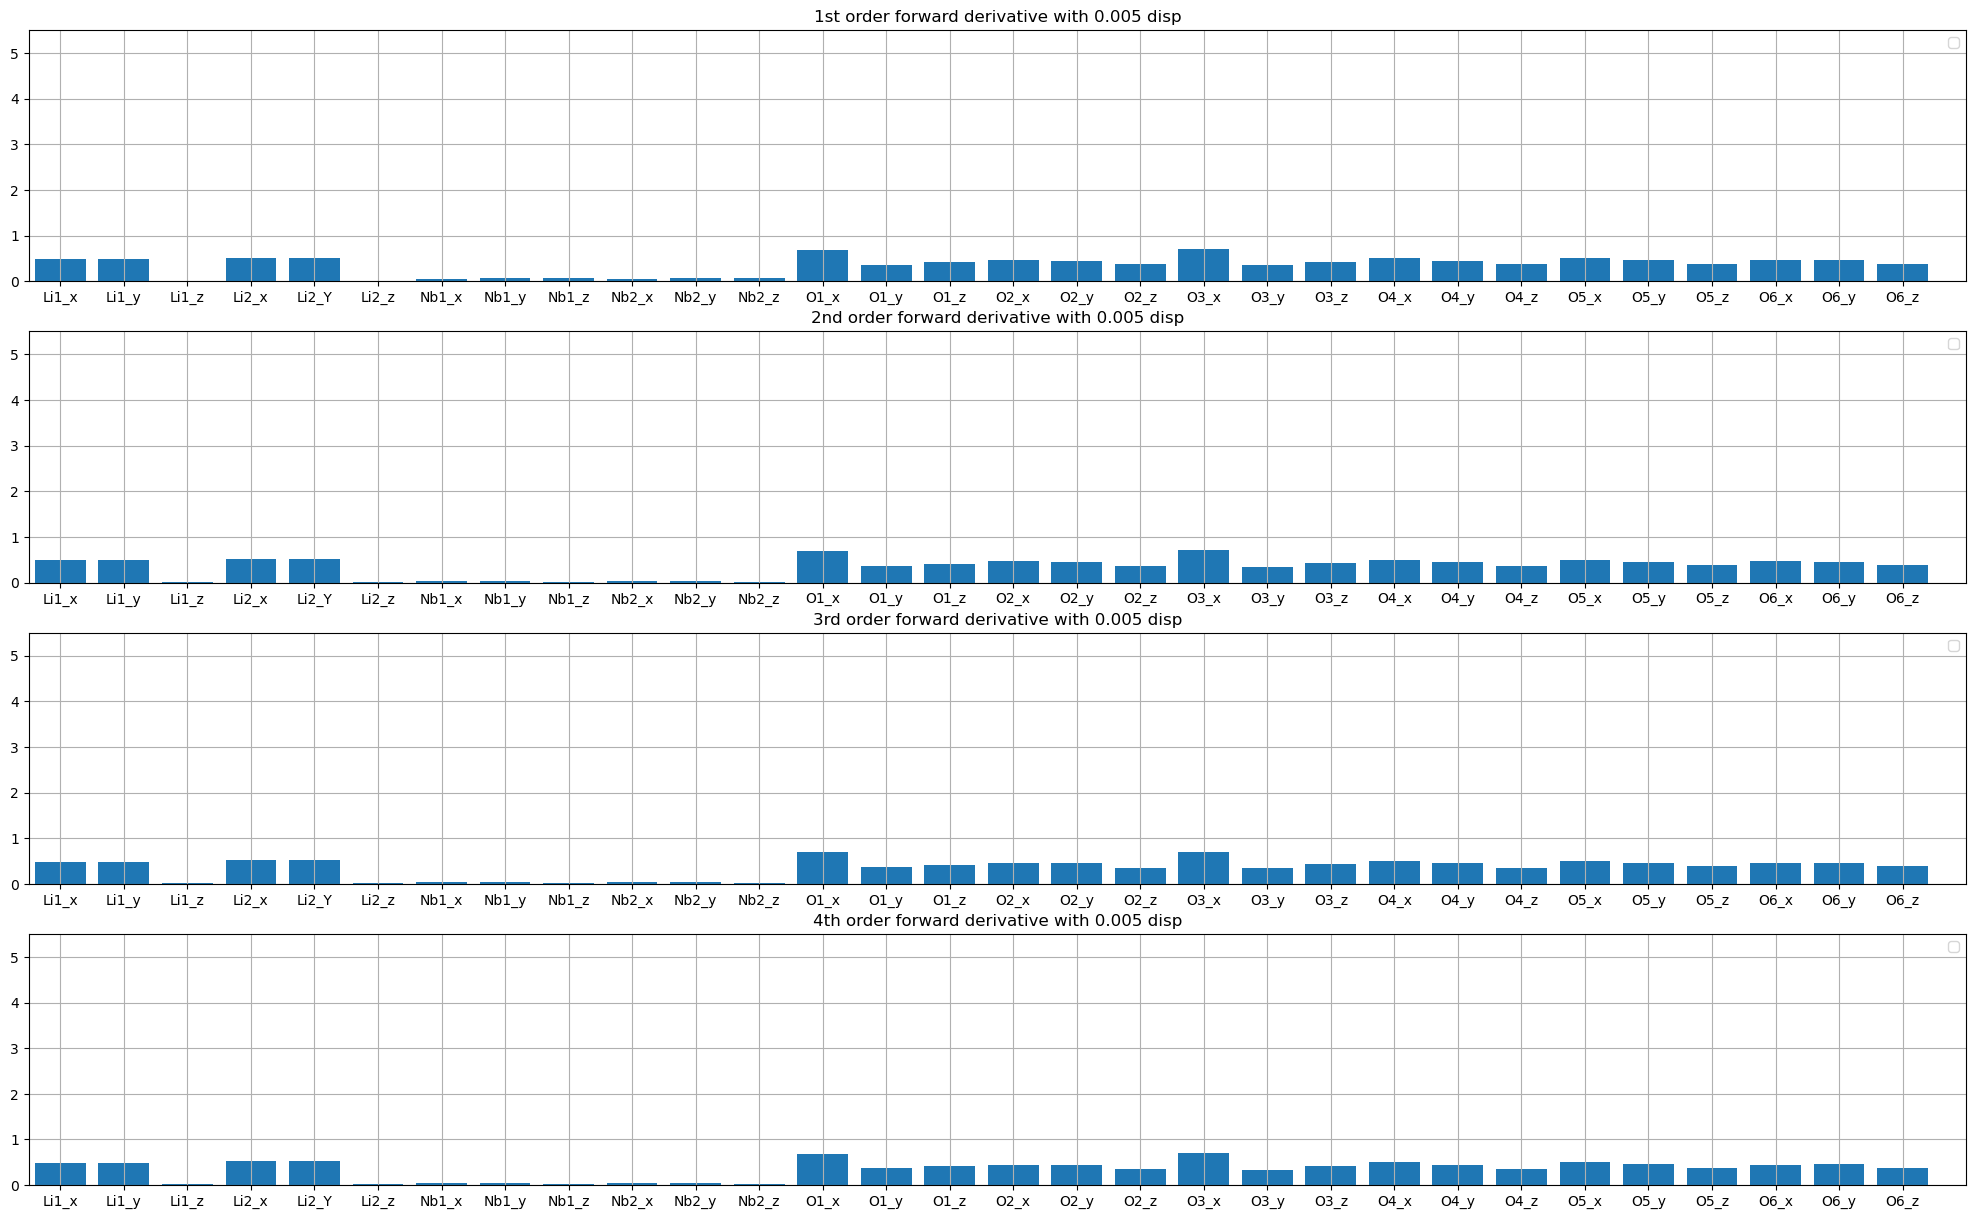

In [42]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, figsize=(25, 15))
fig.dpi = 100
mode = ["Li1_x", "Li1_y", "Li1_z", "Li2_x", "Li2_Y", "Li2_z", "Nb1_x", "Nb1_y", "Nb1_z", "Nb2_x", "Nb2_y", "Nb2_z", "O1_x", "O1_y", "O1_z", "O2_x", "O2_y", "O2_z", "O3_x", "O3_y", "O3_z", "O4_x", "O4_y", "O4_z", "O5_x", "O5_y", "O5_z", "O6_x", "O6_y", "O6_z"]


ax[0].bar(mode, max_dchi_dtau_PE_forward_1st)
ax[0].axis([-0.5, 30, 0, 5.5])
# ax[0].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[0].set_xlabel('mode')
ax[0].grid(True)
ax[0].set_title("1st order forward derivative with 0.005 disp")
ax[0].legend()
ax[0].set_xticks(mode)


ax[1].bar(mode, max_dchi_dtau_PE_forward_2nd)
ax[1].axis([-0.5, 30, 0, 5.5])
# ax[0].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[0].set_xlabel('mode')
ax[1].grid(True)
ax[1].set_title("2nd order forward derivative with 0.005 disp")
ax[1].legend()
ax[1].set_xticks(mode)

ax[2].bar(mode, max_dchi_dtau_PE_forward_3rd)
ax[2].axis([-0.5, 30, 0, 5.5])
# ax[1].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[1].set_xlabel('mode')
ax[2].grid(True)
ax[2].set_title("3rd order forward derivative with 0.005 disp")
ax[2].legend()
ax[2].set_xticks(mode)


ax[3].bar(mode, max_dchi_dtau_PE_forward_4th)
ax[3].axis([-0.5, 30, 0, 5.5])
# ax[2].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[2].set_xlabel('mode')
ax[3].grid(True)
ax[3].set_title("4th order forward derivative with 0.005 disp")
ax[3].legend()
ax[3].set_xticks(mode)


# fig.suptitle("The change of susceptibility with 0.01, 0.05, and 0.1 Ang")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

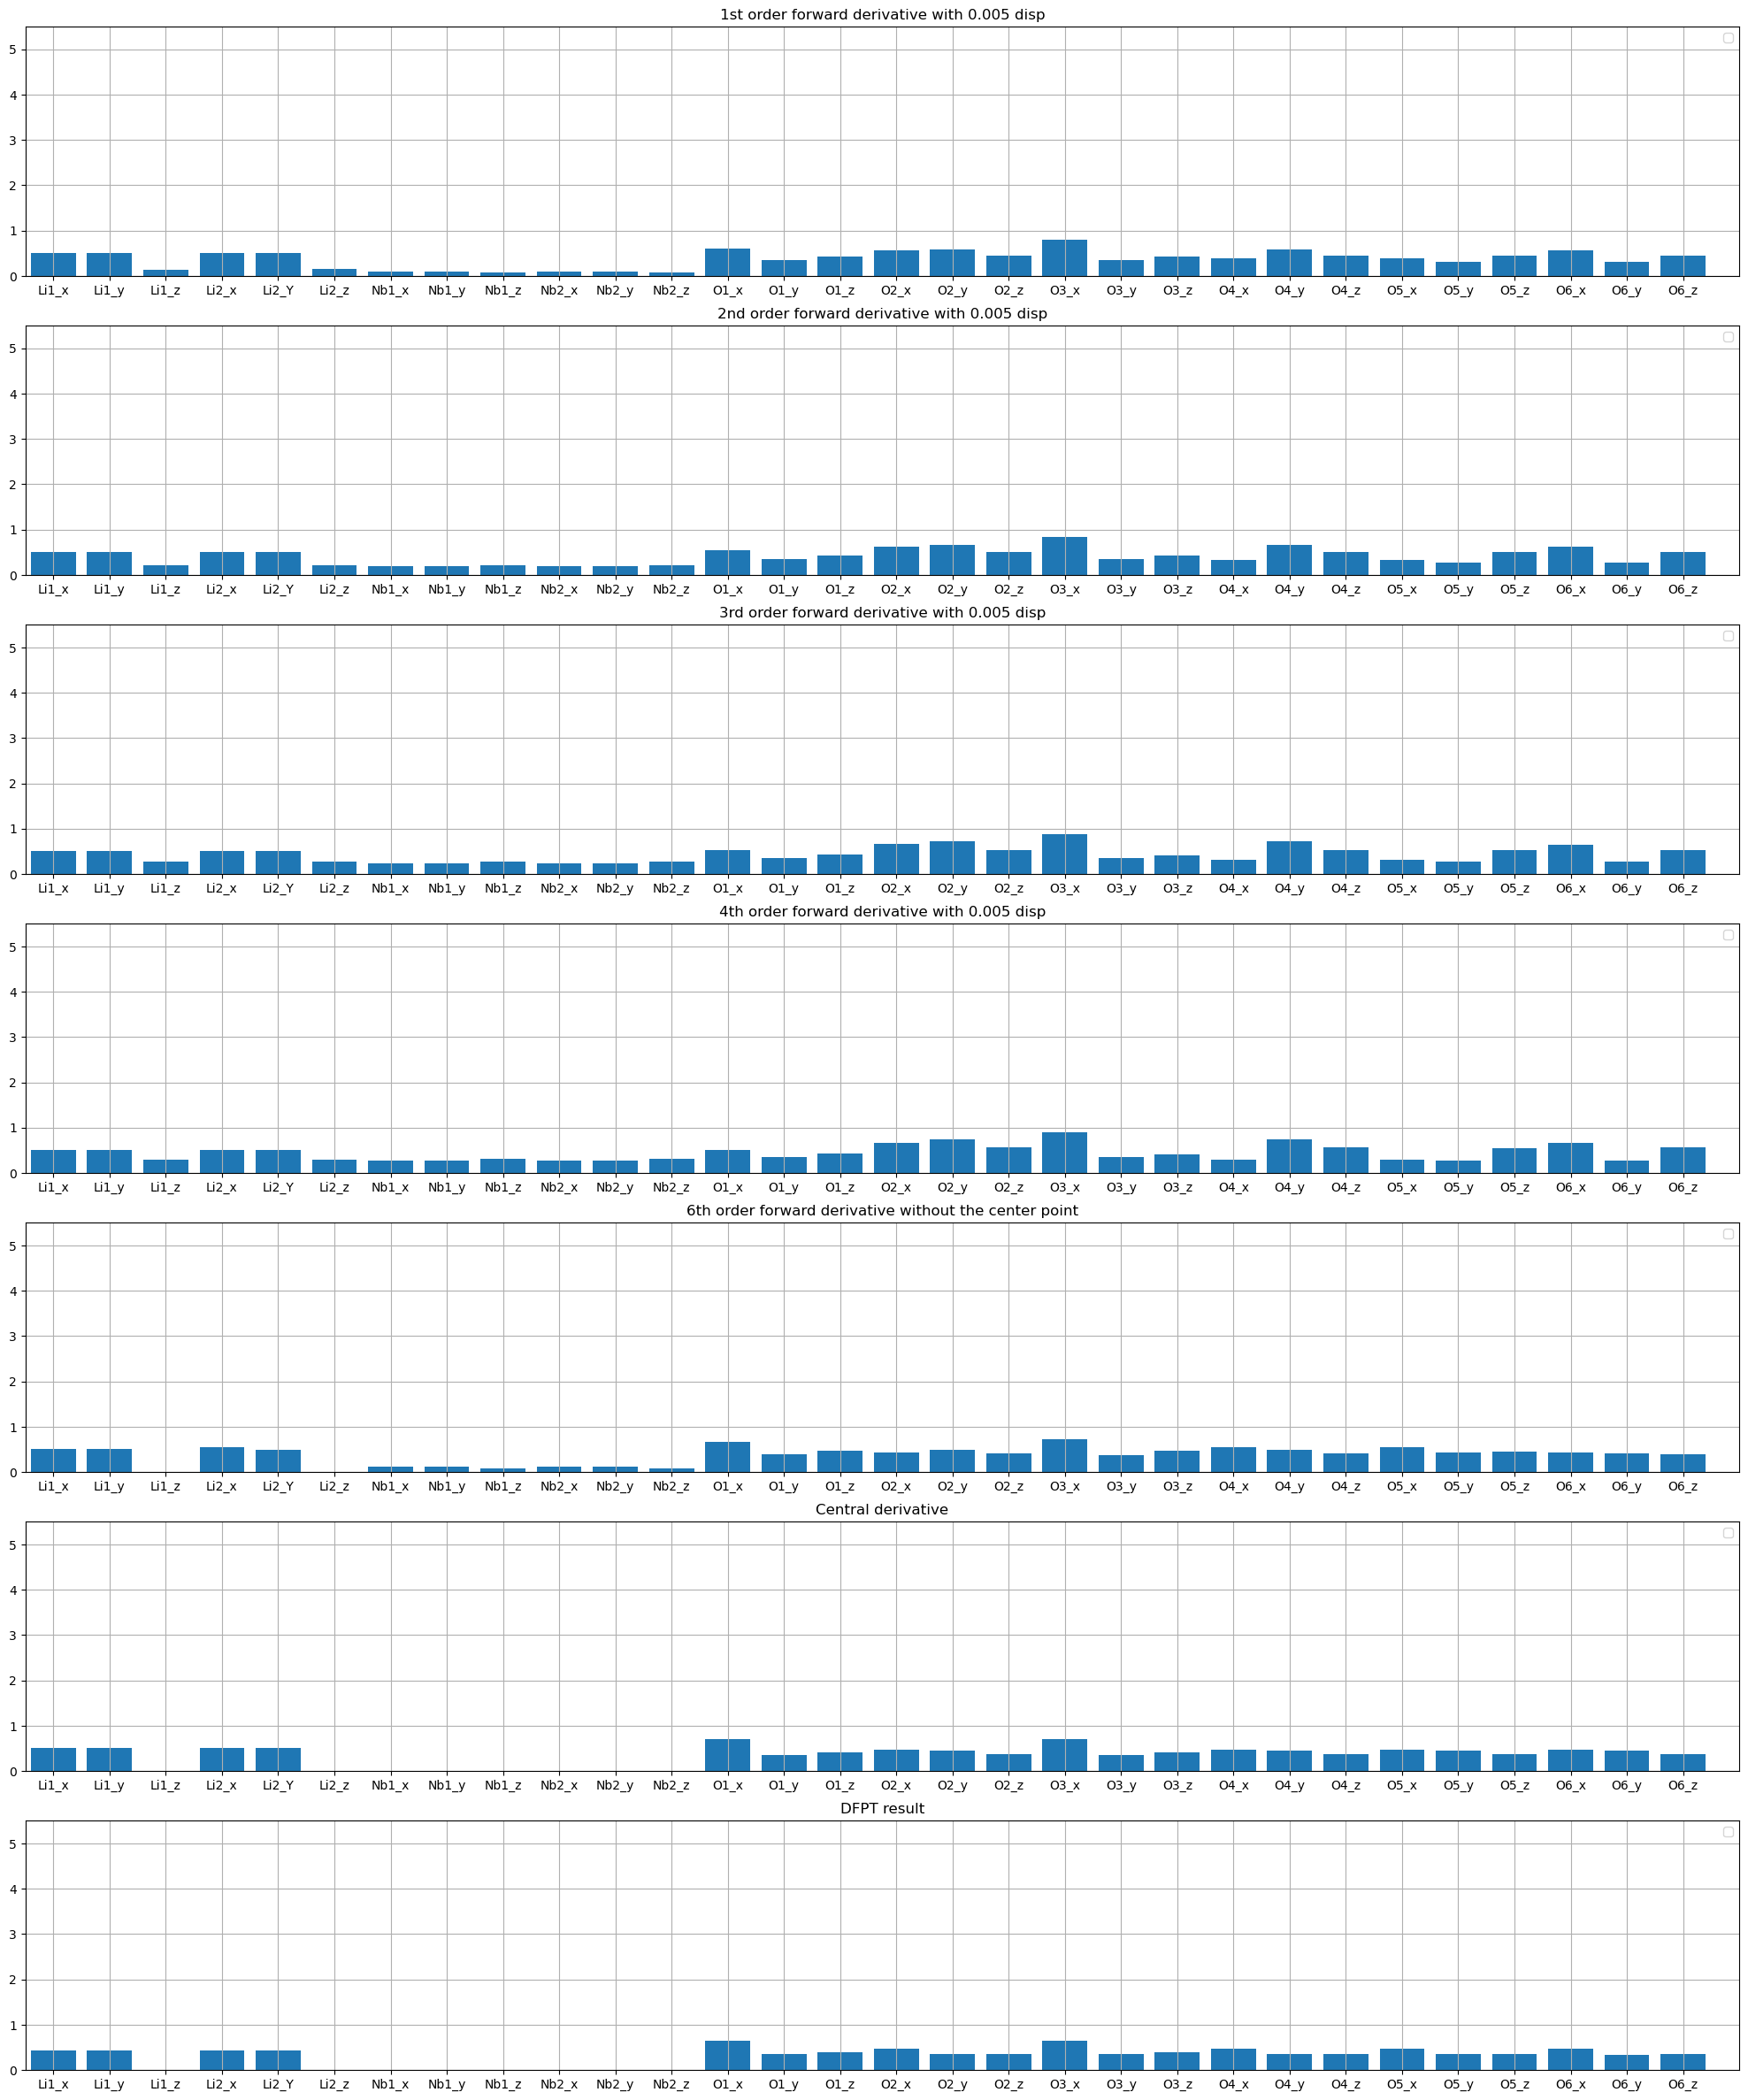

In [38]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=7, figsize=(25, 30))
fig.dpi = 100
mode = ["Li1_x", "Li1_y", "Li1_z", "Li2_x", "Li2_Y", "Li2_z", "Nb1_x", "Nb1_y", "Nb1_z", "Nb2_x", "Nb2_y", "Nb2_z", "O1_x", "O1_y", "O1_z", "O2_x", "O2_y", "O2_z", "O3_x", "O3_y", "O3_z", "O4_x", "O4_y", "O4_z", "O5_x", "O5_y", "O5_z", "O6_x", "O6_y", "O6_z"]


ax[0].bar(mode, max_dchi_dtau_PE_forward_1st)
ax[0].axis([-0.5, 30, 0, 5.5])
# ax[0].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[0].set_xlabel('mode')
ax[0].grid(True)
ax[0].set_title("1st order forward derivative with 0.005 disp")
ax[0].legend()
ax[0].set_xticks(mode)


ax[1].bar(mode, max_dchi_dtau_PE_forward_2nd)
ax[1].axis([-0.5, 30, 0, 5.5])
# ax[0].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[0].set_xlabel('mode')
ax[1].grid(True)
ax[1].set_title("2nd order forward derivative with 0.005 disp")
ax[1].legend()
ax[1].set_xticks(mode)

ax[2].bar(mode, max_dchi_dtau_PE_forward_3rd)
ax[2].axis([-0.5, 30, 0, 5.5])
# ax[1].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[1].set_xlabel('mode')
ax[2].grid(True)
ax[2].set_title("3rd order forward derivative with 0.005 disp")
ax[2].legend()
ax[2].set_xticks(mode)


ax[3].bar(mode, max_dchi_dtau_PE_forward_4th)
ax[3].axis([-0.5, 30, 0, 5.5])
# ax[2].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[2].set_xlabel('mode')
ax[3].grid(True)
ax[3].set_title("4th order forward derivative with 0.005 disp")
ax[3].legend()
ax[3].set_xticks(mode)

ax[4].bar(mode, max_dchi_dtau_PE_forward_6th)
ax[4].axis([-0.5, 30, 0, 5.5])
# ax[2].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[2].set_xlabel('mode')
ax[4].grid(True)
ax[4].set_title("6th order forward derivative without the center point")
ax[4].legend()
ax[4].set_xticks(mode)


ax[5].bar(mode, max_dchi_dtau_PE)
ax[5].axis([-0.5, 30, 0, 5.5])
# ax[0].set_ylabel('Maximum component of the change of dielectric tensor')
# ax[0].set_xlabel('mode')
ax[5].grid(True)
ax[5].set_title("Central derivative")
ax[5].legend()
ax[5].set_xticks(mode)


dfpt = np.array([0.018214417, 0.018214417, 0, 0.018214417, 0.018214417, 0, 0, 0, 0, 0, 0, 0, 0.027066121, 0.014508576, 0.016817992, 0.019459828, 0.014932926, 0.014564808, 0.027066121, 0.014508576, 0.016817992, 0.019459828, 0.014932926, 0.014564808, 0.019459828, 0.014932926, 0.014564808, 0.019459827, 0.014053706, 0.014564808]) * 4*np.pi * 1.88973
ax[6].bar(mode, dfpt)
ax[6].axis([-0.5, 30, 0, 5.5])
# ax[2].set_ylabel('DFPT result')
# ax[2].set_xlabel('mode')
ax[6].grid(True)
ax[6].set_title("DFPT result")
ax[6].legend()
ax[6].set_xticks(mode)





# fig.suptitle("The change of susceptibility with 0.01, 0.05, and 0.1 Ang")

In [92]:
np.array([0.018214417, 0.018214417, 0, 0.018214417, 0.018214417, 0, 0, 0, 0, 0, 0, 0, 0.027066121, 0.014508576, 0.016817992, 0.019459828, 0.014932926, 0.014564808, 0.027066121, 0.014508576, 0.016817992, 0.019459828, 0.014932926, 0.014564808, 0.019459828, 0.014932926, 0.014564808, 0.019459827, 0.014053706, 0.014564808]) * 4*np.pi * 1.88973

array([0.43253863, 0.43253863, 0.        , 0.43253863, 0.43253863,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.64274046, 0.34453584, 0.39937766,
       0.46211346, 0.3546129 , 0.34587119, 0.64274046, 0.34453584,
       0.39937766, 0.46211346, 0.3546129 , 0.34587119, 0.46211346,
       0.3546129 , 0.34587119, 0.46211344, 0.33373402, 0.34587119])